# Chapter: Classification

* Assign a class to observations with **features**
* Automatically assign class to new observation with features, using previous observations
* **Binary** classification : two classes
* **Multiclass** classification: more than two classes

### Decision trees
* it is a sequence of questinos 
* a tree has Root , Edges, Nodes (Edges = branches)

### Learn a tree
* Use a training set
* Come up with queries (features tests) for each node
* Goal : end up with **pure** leafs - leafs that contain observations of one particular class
    * in practice this is almost newvera the case  (presence of noise) 
    *  assign class of majority of training instances
* a Key is split a tree on a right set of features    


* Make list of feature tests
* Choose test with best split

### Information gain
* Information gained from split based on feature test
    * Test leads to nicely divided classes
        -> High **information gain**
    * Test leads to scrambled classes
        -> low **information gain**

### Pruning 
 * Number of nodes influences chance of overfit
 * Restrict size -> higher bias
     * Decreas chance on overfit
         * Process called Pruning the decision tree
 * will not automatically increase the predictive power of the model
 * most algorithms  for classification (e.g  R's rpart) use effective stopping criteria to stop the number of nodes

In [6]:
##plotting a fancy plot of decision tree
require(rpart)
require(rpart.plot)
require(rattle)
require(RColorBrewer)
#load titanic dataset
titanic<-read.csv(file="titanic.csv", row.names=1,header=TRUE
				,colClasses=c("numeric", "factor", "numeric", "factor", "numeric") )
#rearrange factor levesls
titanic$Survived <- factor(titanic$Survived, levels=c("1", "0")) #arrange factor levels
titanic$Pclass <- factor(titanic$Pclass, levels=c("1","2","3"))
#indexes of a test set
idx_test <- c(555,147,140,652,290,412,84,176,156,110,179,407,2,420,391,326,385,618,222,703,573,327,427,525,677,536,606,142,486,547,697,414,467,503,22,599,470,517,225,358,70,271,613,455,537,20,670,367,94,632,299,346,671,647,124,61,601,186,129,679,231,283,52,362,544,237,36,673,395,139,487,375,312,14,433,411,510,423,308,642,315,681,86,5,614,54,688,471,587,600,69,648,707,657,135,619,259,588,261,333,546,105,509,208,108,197,302,43,616,466,328,187,711,359,701,682,674,245,492,698,273,603,320,434,393,569,200,195,257,329,73,189,26,133,221,191,534,131,522,482,653,220,235,149,691,668,3,687,46,182,543,256,463,505,548,633,172,97,175,479,672,174,306,32,18,419,167,232,621,83,236,65,164,180,63,709,397,478,11,634,27,493,530,574,297,71,591,145,549,340,661,106,365,91,9,409,443,120,211,641,476,516,440,625,7,284,230,640,59,413,360,241,269,441)
#split dataset between test and train
test <- titanic[idx_test,]
train <- titanic[-idx_test,]


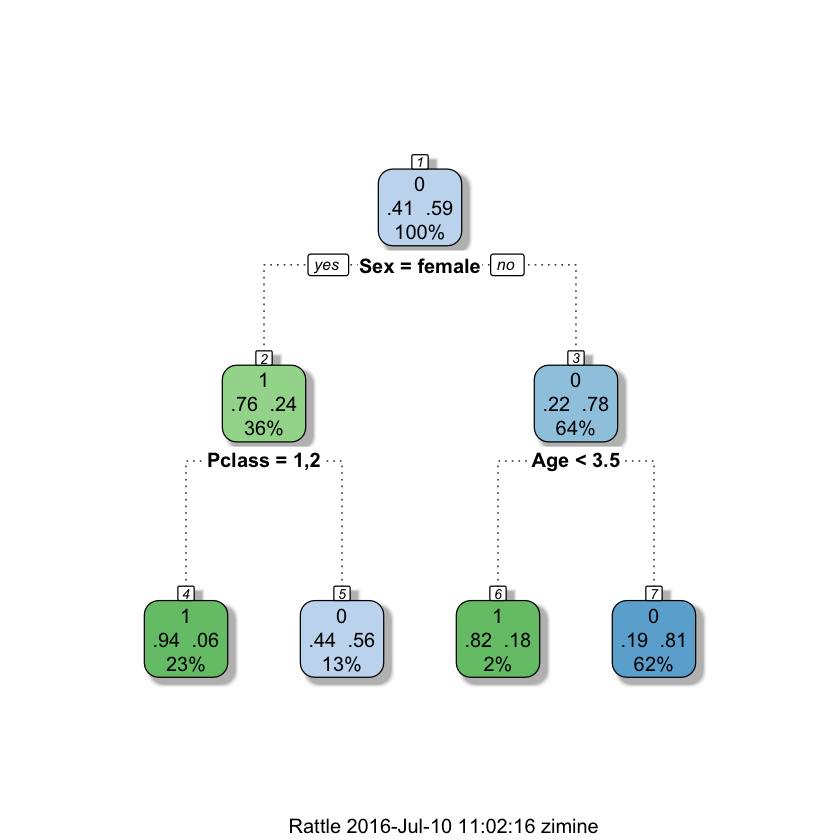

In [10]:
#actual command to plot a a tree 
set.seed(1)
tree <- rpart(Survived ~ Pclass+Sex+Age, data=train, method="class")
fancyRpartPlot(tree)

In [13]:
#how this model tree performs on the test dataset
conf_test <- table(test$Survived, predict(tree, test, type="class"))
print(conf_test)
print(paste('accuracy on test data', sum(diag(conf_test))/sum(conf_test)   )) # 80% not bad

   
      1   0
  1  47  38
  0   5 124
[1] "accuracy on test data 0.799065420560748"


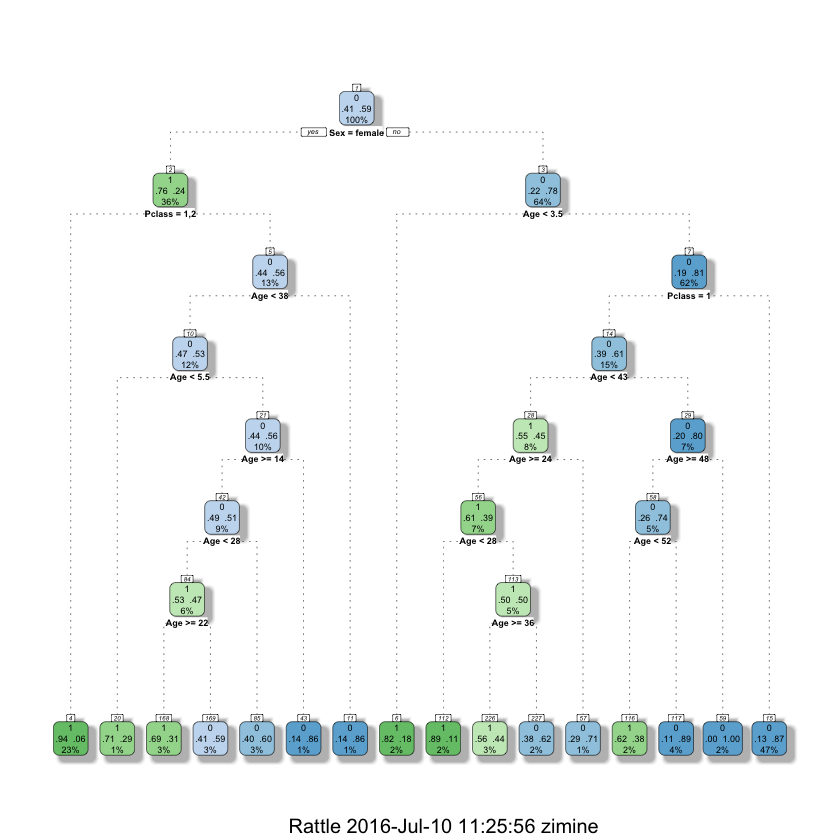

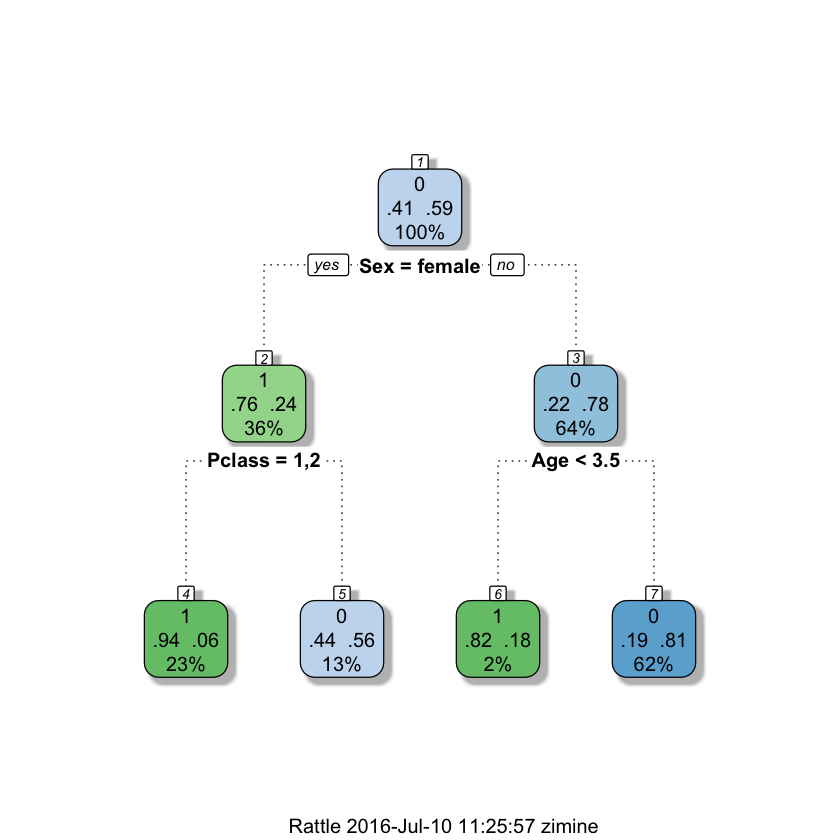

In [15]:
##example of prunning (reducing number of nodes) of the tree
tree1 <- rpart(Survived ~ ., train, method = "class", control = rpart.control(cp=0.00001))
# note the rpart.control parameter
fancyRpartPlot(tree1)
pruned <- prune(tree1, cp=0.01)
fancyRpartPlot(pruned)
#always useful to check the accuracy value

### k-Nearest Neihbors  (Instance-based learning) 
* Save training set in memory
* no real model like decision three
* Compare unseen instances to training set

#### k-nearest neighbor
* form of instance-based learning
* measure distance between unseen observation with its k closest neighbors
    * a class of a new observation is the one which is most represented in k closests neighbors

##### Distance metric
* Euclidian distance  $d_E(\mathbf{a},\mathbf{b}) = \sqrt{ sum_i^D (a_i - b_i)^2} $
* Manhattan distance  $d_M(\mathbf{a},\mathbf{b}) = \sum_i^D |a_i - b_i| $

##### Scaling of features
* Features must be normalized so that distance between them can be used for comparable
* Normalize all fatures  ( rescale values between 0 and 1 ) 
* Don't forget to scale new observations

##### Categorical features
* for categorial features ( factorrs)  needs to create dummy variables
*  one factor variable with N levels  needs a a creation of **N** binary features (True,False)


In [21]:
### knn on titanic dataset (use same test and train sets)
set.seed(1)
##load dataset
titanic<-read.csv(file="titanic.csv", row.names=1,header=TRUE
				,colClasses=c("numeric", "factor", "numeric", "factor", "numeric") )

titanic$Survived <- factor(titanic$Survived, levels=c("1", "0")) #arrange factor levels
## a vector of indexes for a test set (length 214 elements)
idx_test <- c(555,147,140,652,290,412,84,176,156,110,179,407,2,420,391,326,385,618,222,703,573,327,427,525,677,536,606,142,486,547,697,414,467,503,22,599,470,517,225,358,70,271,613,455,537,20,670,367,94,632,299,346,671,647,124,61,601,186,129,679,231,283,52,362,544,237,36,673,395,139,487,375,312,14,433,411,510,423,308,642,315,681,86,5,614,54,688,471,587,600,69,648,707,657,135,619,259,588,261,333,546,105,509,208,108,197,302,43,616,466,328,187,711,359,701,682,674,245,492,698,273,603,320,434,393,569,200,195,257,329,73,189,26,133,221,191,534,131,522,482,653,220,235,149,691,668,3,687,46,182,543,256,463,505,548,633,172,97,175,479,672,174,306,32,18,419,167,232,621,83,236,65,164,180,63,709,397,478,11,634,27,493,530,574,297,71,591,145,549,340,661,106,365,91,9,409,443,120,211,641,476,516,440,625,7,284,230,640,59,413,360,241,269,441)

test <- titanic[idx_test,]
train <- titanic[-idx_test,]

#convert factor Sex  to a numeric variable, substract 1  to have in normalized mode [0,1]
test$Sex <- as.numeric(test$Sex)-1
train$Sex <- as.numeric(train$Sex)-1

#save response labels
train_labels <- train$Survived
test_labels <- test$Survived 
## copy data sets to knn_train and ktt_test
knn_train <- train 
knn_test  <- test 
knn_train[,1] <- NULL # drop the Survived column 
knn_test[,1] <- NULL 

##normalize Pclass 
min_class <- min(knn_train$Pclass)
max_class <- max(knn_train$Pclass)
knn_train$Pclass <- (knn_train$Pclass - min_class) / (max_class - min_class) # observe min, max from train set used for train
knn_test$Pclass <- (knn_test$Pclass - min_class) / (max_class - min_class)  # same min, max used for test
#normalize Age
min_age <- min(knn_train$Age)
max_age <- max(knn_train$Age)
knn_train$Age <- (knn_train$Age - min_age) / (max_age - min_age) 
knn_test$Age <- (knn_test$Age - min_age) / (max_age - min_age) 
## by now knn_train, knn_tess  are normalized
re      -nn classificaiton 
pred <- knn(train = knn_train, test=knn_test, cl=train_labels, k=5) # use 5 neighbors
conf <- table(test_labels, pred) #confusion matrix
print(conf)

           pred
test_labels   1   0
          1  61  24
          0  17 112


[1] "k with highest accurancy: 73"


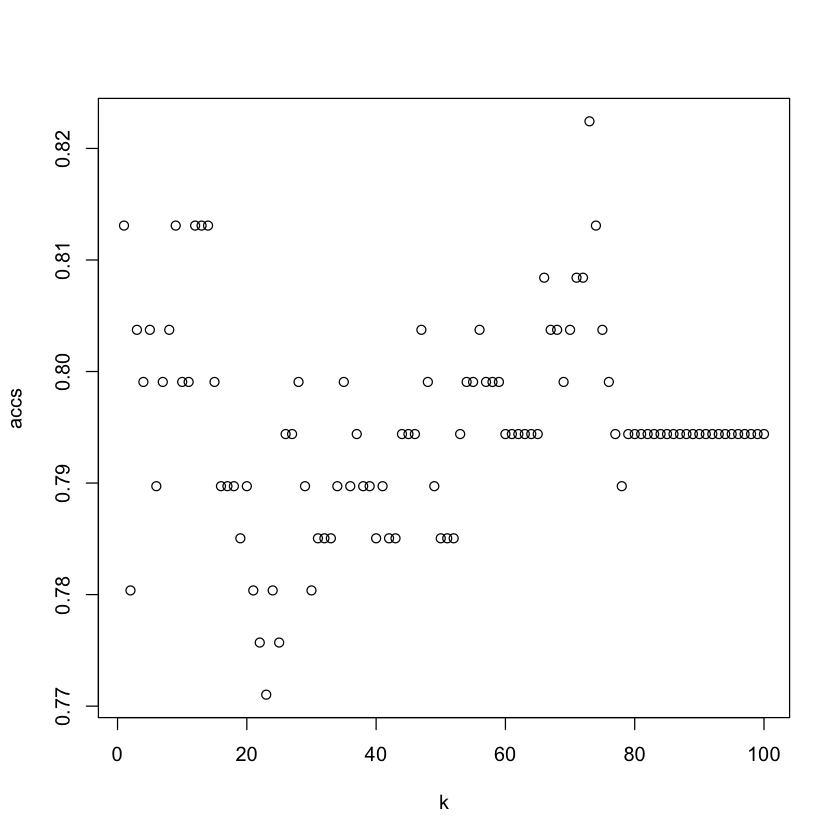

In [24]:
### find the best k in knn (higherst accuracy)
set.seed(1)
range <- 1:round(0.2 * nrow(knn_train))  # 1:100
accs <- rep(0,length(range))

## interate over k from 1 to 100 
for ( k in range) {
	pred <- knn(train = knn_train, test=knn_test, cl=train_labels, k=k)
	conf <- table(test_labels,pred)  #current confusion matrix
	accs[k] <- sum(diag(conf))/sum(conf) #compute the current accuracy
}
#graphical view of accuracy
plot(range, accs, xlab="k")
#the best k is found as the one with the highest accuracy
print(paste("k with highest accurancy:" ,  which(accs == max(accs)) ))

### the ROC curve
* powerful performance measure
* for **binary** classification
* Receiver Operator Characteristic Curve (ROC)


* True positive rate(TPR) = recall  = TP / ( TP + FN )
* False postive rate (FPR)          = FP  / (FP + TN )

**ROC curve**
* Horizontal axis: FPR
* Vertical axis  : TPR
* Air under the curve. if aire > 0.9, model is very good